In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# import swap data from BoE dataset 2016-now
df = pd.read_excel("GLC Nominal month end data_2016 to present.xlsx", index_col = 0, header = 3, sheet_name = "4. spot curve", skiprows = [4])
df

# still don't really understand how HEADER and SKIPROWS work though (this is zero-indexed)

,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0,...,35.5,36.0,36.5,37.0,37.5,38.0,38.5,39.0,39.5,40.0
years:,,,,,,,,,,,,,,,,,,,,,
2016-01-31,NaN,0.244401,0.261230,0.343575,0.448479,0.558078,0.665545,0.768346,0.865648,0.957344,...,2.313911,2.302217,2.290826,2.279791,2.269156,2.258962,2.249244,2.240031,2.231350,2.223221
2016-02-29,NaN,0.247750,0.221971,0.251252,0.307149,0.376114,0.451709,0.530537,0.610655,0.690875,...,2.283594,2.271275,2.259188,2.247392,2.235940,2.224879,2.214250,2.204090,2.194430,2.185296
2016-03-31,0.398924,0.317599,0.304726,0.341113,0.403295,0.478072,0.558702,0.641520,0.724463,0.806351,...,2.235573,2.222826,2.210364,2.198248,2.186530,2.175260,2.164480,2.154227,2.144532,2.135423
2016-04-30,0.403396,0.377009,0.394922,0.451475,0.527891,0.613297,0.702283,0.792029,0.881014,0.968388,...,2.329159,2.315942,2.303054,2.290554,2.278498,2.266932,2.255899,2.245434,2.235568,2.226326
2016-05-31,0.355915,0.308145,0.329863,0.393530,0.475500,0.563811,0.652864,0.739989,0.823990,0.904445,...,2.132385,2.118499,2.104999,2.091950,2.079409,2.067423,2.056036,2.045285,2.035199,2.025803
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-31,NaN,4.444293,4.184906,3.992645,3.855964,3.759080,3.690639,3.643575,3.613372,3.596944,...,4.391306,4.380681,4.369753,4.358517,4.346969,4.335105,4.322920,4.310409,4.297568,4.284392
2024-02-29,NaN,4.623155,4.461514,4.324702,4.219551,4.139254,4.077467,4.030183,3.994848,3.969726,...,4.445984,4.434650,4.422997,4.411029,4.398746,4.386147,4.373233,4.360001,4.346453,4.332586
2024-03-31,4.706128,4.541766,4.336954,4.169571,4.042023,3.945136,3.871530,3.816500,3.776820,3.750118,...,4.337019,4.326978,4.316587,4.305843,4.294742,4.283278,4.271447,4.259246,4.246670,4.233716


In [4]:
# standardize, and perform eigendecomposition
df = df.dropna(how = "any")

In [5]:
df_std = ((df - df.mean()) / df.std())
df_std.head()

,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0,...,35.5,36.0,36.5,37.0,37.5,38.0,38.5,39.0,39.5,40.0
years:,,,,,,,,,,,,,,,,,,,,,
2016-03-31,-0.444320,-0.519920,-0.536210,-0.522174,-0.494459,-0.460725,-0.424525,-0.387728,-0.351393,-0.316156,...,0.261719,0.259619,0.257626,0.255769,0.254078,0.252577,0.251290,0.250239,0.249446,0.248927
2016-04-30,-0.441540,-0.482640,-0.478394,-0.449760,-0.410843,-0.368041,-0.324164,-0.280589,-0.238061,-0.197025,...,0.342227,0.339858,0.337637,0.335597,0.333767,0.332171,0.330835,0.329779,0.329023,0.328585
2016-05-31,-0.471054,-0.525852,-0.520097,-0.487781,-0.446003,-0.401959,-0.358707,-0.317634,-0.279343,-0.244036,...,0.172951,0.169720,0.166672,0.163842,0.161258,0.158947,0.156932,0.155235,0.153874,0.152867
2016-06-30,-0.459417,-0.649368,-0.684120,-0.694186,-0.692065,-0.683008,-0.669732,-0.653862,-0.636389,-0.617933,...,-0.276423,-0.282116,-0.287605,-0.292852,-0.297817,-0.302468,-0.306774,-0.310710,-0.314251,-0.317374
2016-07-31,-0.623178,-0.686131,-0.708871,-0.718879,-0.723107,-0.723591,-0.721498,-0.717653,-0.712602,-0.706672,...,-0.381565,-0.384830,-0.387990,-0.391019,-0.393890,-0.396581,-0.399071,-0.401342,-0.403375,-0.405155


In [6]:
# create a covariance matrix
cov_matrix = np.array(np.cov(df_std, rowvar = False))
cov_matrix


array([[1.        , 0.99526647, 0.98980018, ..., 0.9496275 , 0.94969758,
        0.9497348 ],
       [0.99526647, 1.        , 0.99885414, ..., 0.94719031, 0.94720402,
        0.94718545],
       [0.98980018, 0.99885414, 1.        , ..., 0.94437101, 0.9443496 ,
        0.94429722],
       ...,
       [0.9496275 , 0.94719031, 0.94437101, ..., 1.        , 0.99999826,
        0.99999318],
       [0.94969758, 0.94720402, 0.9443496 , ..., 0.99999826, 1.        ,
        0.99999832],
       [0.9497348 , 0.94718545, 0.94429722, ..., 0.99999318, 0.99999832,
        1.        ]])

In [8]:
# eigen 
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
eigenvalues.size

80

In [13]:
eigenvalues = np.real_if_close(eigenvalues, tol = 100)
eigenvalues

array([78.84368508,  0.92069074,  0.20758098,  0.01655412,  0.0067201 ,
        0.00346861,  0.00112373,  0.00012153,  0.00002924,  0.00002056,
        0.00000371,  0.00000092,  0.00000052,  0.0000001 ,  0.00000004,
        0.00000001,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -0.        ,  0.        , -0.        , -0.        ,
        0.        ,  0.        ,  0.        , -0.        , -0.        ,
       -0.        , -0.        ,  0.        ,  0.        ,  0.        ,
       -0.        , -0.        , -0.        ,  0.        ,  0.  

In [15]:
eigenvectors = np.real_if_close(eigenvectors, tol = 1000)
eigenvectors

array([[-0.10806702+0.j,  0.17794856+0.j,  0.47145377+0.j, ...,
         0.0000002 +0.j, -0.00000041+0.j, -0.00000038+0.j],
       [-0.10858021+0.j,  0.22731255+0.j,  0.32602139+0.j, ...,
         0.00000544+0.j,  0.00000006+0.j, -0.00000625+0.j],
       [-0.10865181+0.j,  0.24816415+0.j,  0.24060259+0.j, ...,
        -0.00006298+0.j,  0.00010178+0.j,  0.00017804+0.j],
       ...,
       [-0.11201932+0.j, -0.08970052+0.j,  0.10957047+0.j, ...,
        -0.12796667+0.j, -0.23446492+0.j, -0.10658151+0.j],
       [-0.11200864+0.j, -0.08985466+0.j,  0.11178561+0.j, ...,
        -0.03371938+0.j,  0.13241843+0.j,  0.09734034+0.j],
       [-0.11199755+0.j, -0.09009186+0.j,  0.11382443+0.j, ...,
         0.02511346+0.j, -0.02339373+0.j, -0.02248248+0.j]])

In [16]:
df_eigval = pd.DataFrame({"Eigenvalues":eigenvalues}, index = range(1, 81))
df_eigval

,Eigenvalues
1,7.884369e+01
2,9.206907e-01
3,2.075810e-01
4,1.655412e-02
5,6.720099e-03
...,...
76,2.449992e-17
77,4.928205e-17
78,3.192486e-16
79,1.793705e-16


In [17]:
# work out explained proportion
df_eigval["Explained Proportion"] = df_eigval["Eigenvalues"] / np.sum(df_eigval["Eigenvalues"])

# format as percentage
df_eigval.style.format({"Explained proportion: ":"{:.2%}"})

,Eigenvalues,Explained Proportion
1,78.843685,0.985546
2,0.920691,0.011509
3,0.207581,0.002595
4,0.016554,0.000207
5,0.006720,0.000084
6,0.003469,0.000043
7,0.001124,0.000014
8,0.000122,0.000002
9,0.000029,0.000000
10,0.000021,0.000000


In [18]:
np.set_printoptions(suppress=True)
df_eigval

,Eigenvalues,Explained Proportion
1,7.884369e+01,9.855461e-01
2,9.206907e-01,1.150863e-02
3,2.075810e-01,2.594762e-03
4,1.655412e-02,2.069265e-04
5,6.720099e-03,8.400124e-05
...,...,...
76,2.449992e-17,3.062490e-19
77,4.928205e-17,6.160257e-19
78,3.192486e-16,3.990607e-18
79,1.793705e-16,2.242132e-18


In [19]:
# PCA projections
principal_components = df_std.dot(eigenvectors)
principal_components.head()

,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
years:,,,,,,,,,,,,,,,,,,,,,
2016-03-31,-0.702153+0.000000j,-2.200320+0.000000j,-0.186126+0.000000j,-0.010196+0.000000j,0.121765+0.000000j,0.044911+0.000000j,-0.006669+0.000000j,0.002619+0.000000j,-0.006138+0.000000j,0.000876+0.000000j,...,-2.170295e-10+0.000000e+ 00j,8.049296e-09+0.000000e+ 00j,-3.273182e-08+0.000000e+ 00j,2.236852e-09+5.329828e- 09j,2.236852e-09-5.329828e- 09j,-3.221983e-08+0.000000e+ 00j,1.646630e-08+0.000000e+ 00j,3.006946e-09+0.000000e+ 00j,1.248608e-08+0.000000e+ 00j,8.689754e-09+0.000000e+ 00j
2016-04-30,-1.629879+0.000000j,-2.135508+0.000000j,-0.426903+0.000000j,-0.042975+0.000000j,0.094885+0.000000j,0.043126+0.000000j,-0.001895+0.000000j,0.003746+0.000000j,0.000099+0.000000j,0.002154+0.000000j,...,-9.249572e-09+0.000000e+ 00j,-4.937856e-09+0.000000e+ 00j,2.306402e-08+0.000000e+ 00j,6.543367e-09-3.219917e- 11j,6.543367e-09+3.219917e- 11j,1.337660e-08+0.000000e+ 00j,-6.200358e-11+0.000000e+ 00j,5.438963e-09+0.000000e+ 00j,-8.843069e-09+0.000000e+ 00j,-6.632658e-09+0.000000e+ 00j
2016-05-31,-0.486073+0.000000j,-1.777114+0.000000j,-0.410786+0.000000j,0.028252+0.000000j,0.127381+0.000000j,0.076709+0.000000j,-0.018285+0.000000j,0.009226+0.000000j,-0.005846+0.000000j,-0.001764+0.000000j,...,2.114202e-09+0.000000e+ 00j,-9.780974e-09+0.000000e+ 00j,6.387234e-09+0.000000e+ 00j,1.275970e-08-4.540276e- 09j,1.275970e-08+4.540276e- 09j,-6.794443e-09+0.000000e+ 00j,6.439642e-09+0.000000e+ 00j,-1.386285e-08+0.000000e+ 00j,-1.695938e-08+0.000000e+ 00j,-2.292871e-08+0.000000e+ 00j
2016-06-30,3.073379+0.000000j,-1.347797+0.000000j,-0.082640+0.000000j,0.326853+0.000000j,-0.034463+0.000000j,0.080811+0.000000j,0.030807+0.000000j,0.037768+0.000000j,0.002555+0.000000j,0.007297+0.000000j,...,7.265217e-10+0.000000e+ 00j,9.445331e-09+0.000000e+ 00j,6.610352e-09+0.000000e+ 00j,-1.848122e-08+1.330416e- 09j,-1.848122e-08-1.330416e- 09j,2.288428e-08+0.000000e+ 00j,-2.802280e-08+0.000000e+ 00j,2.063759e-09+0.000000e+ 00j,2.071942e-08+0.000000e+ 00j,2.841822e-08+0.000000e+ 00j
2016-07-31,4.334797+0.000000j,-1.199316+0.000000j,0.202770+0.000000j,0.149754+0.000000j,0.149913+0.000000j,0.015400+0.000000j,0.045521+0.000000j,0.005054+0.000000j,0.000585+0.000000j,0.003659+0.000000j,...,1.245680e-08+0.000000e+ 00j,-8.841711e-09+0.000000e+ 00j,8.438828e-09+0.000000e+ 00j,-1.930899e-09-3.948238e- 09j,-1.930899e-09+3.948238e- 09j,1.905082e-08+0.000000e+ 00j,-5.623720e-09+0.000000e+ 00j,2.029332e-08+0.000000e+ 00j,5.266842e-09+0.000000e+ 00j,1.217589e-09+0.000000e+ 00j


D:\pythonProject1\venv\Lib\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
D:\pythonProject1\venv\Lib\site-packages\matplotlib\cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


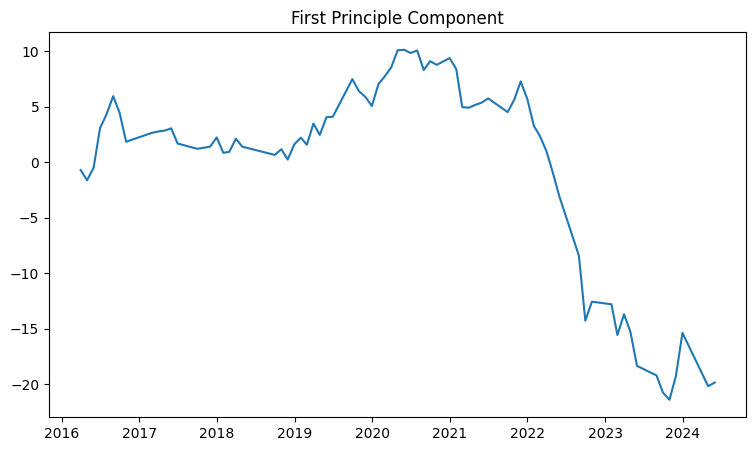

In [20]:
#plt.style.use('ggplot')
ax = plt.figure(figsize=(9,5))
ax = plt.plot(principal_components[0])
ax = plt.title("First Principle Component")

In [22]:
# Calaculate 10Y-2M slope

df_s = pd.DataFrame(data = df)
df_s = df_s[[2,10]]
df_s["slope"] = df_s[10] - df_s[2]
df_s.head()

,2.0,10.0,slope
years:,,,
2016-03-31,0.341113,1.504137,1.163024
2016-04-30,0.451475,1.694745,1.243270
2016-05-31,0.393530,1.547400,1.153870
2016-06-30,0.078958,1.026317,0.947359
2016-07-31,0.041324,0.799763,0.758439


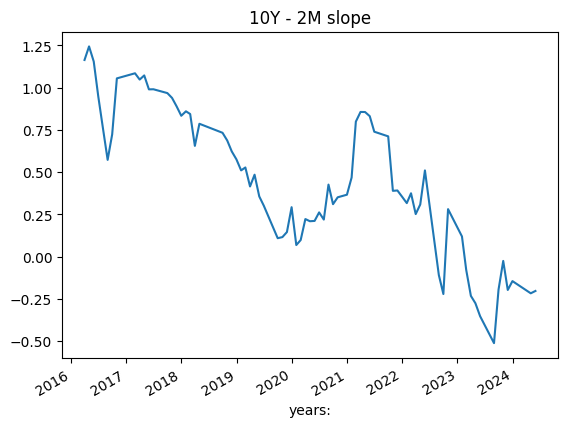

<Figure size 900x500 with 0 Axes>

In [23]:
ax = df_s.plot(y="slope", legend=False)
ax = plt.title("10Y - 2M slope")
ax = plt.figure(figsize=(9,5))